# More examples of Matplotlib

## Import

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# display matplotlib plots inside the notebook
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd

#pd.set_option('precision', 6)
pd.options.display.float_format = '{:.2f}'.format

## Functional Plot

In [4]:
# numpy.linspace(start, stop, num)
# Returns num evenly spaced samples, calculated over the interval [start, stop].
x_1 = np.linspace(0, 5, 10)
y_1 = x_1**3

In [5]:
x_1

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

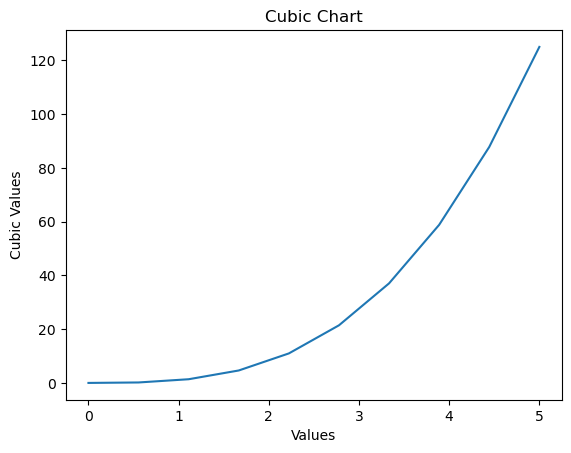

In [6]:
plt.plot(x_1, y_1)
plt.title("Cubic Chart")
plt.xlabel("Values")
_ = plt.ylabel("Cubic Values")

## Figures

A figure is a Python object that countains all the plot elements. You can specify width and height in inches

It can contain:
   * one or more axes
   
What is an axes object in Matplotlib? The Axes object sets the coordinate system and acts as a container for most of the figure elements.

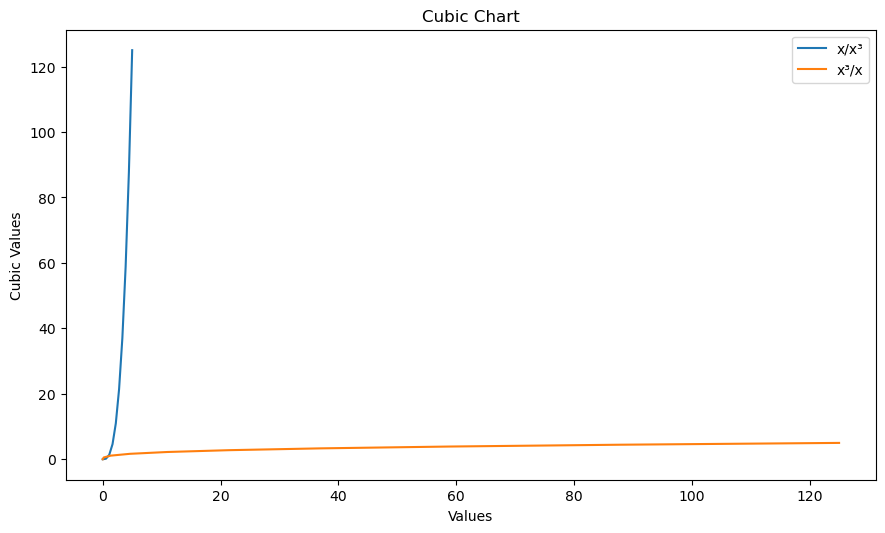

In [7]:
# create a new figue specifying its width and height in inches
my_fig = plt.figure(figsize=(9, 5))

# At the moment the figure has no axes. Let's add a new axis
# Figure.add_axes([left, bottom, width, height]) The dimensions of the new axes are expressed
#    as fractions of the figure width and height
# in this case my axis takes 90% of the width and 90% of the height.
ax_1 = my_fig.add_axes([0.1, 0.1, 0.9, 0.9])

# set axes labels
ax_1.set_xlabel("Values")
ax_1.set_ylabel("Cubic Values")
ax_1.set_title("Cubic Chart")

# plot some stuff
ax_1.plot(x_1, y_1, label="x/x³")
ax_1.plot(y_1, x_1, label="x³/x")
# loc = 0 => tries to find out the best location to place the legend
# legend position: 1 => upper right, 2 => upper left, 3 => lower right, 2 => lower left, 
_ = ax_1.legend(loc=0)

Let's create a figure with more than one axis

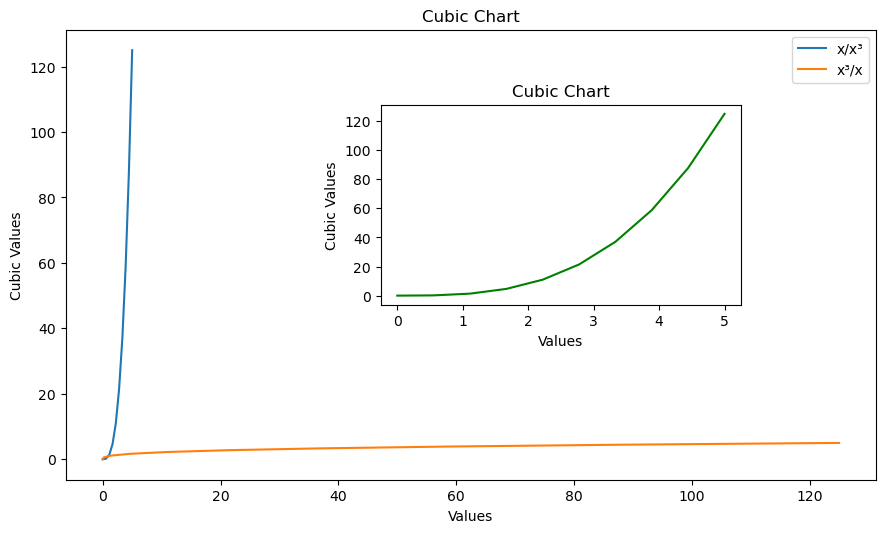

In [8]:
# same as before
new_fig = plt.figure(figsize=(9, 5))
ax_1 = new_fig.add_axes([0.1, 0.1, 0.9, 0.9])
ax_1.set_xlabel("Values")
ax_1.set_ylabel("Cubic Values")
ax_1.set_title("Cubic Chart")
ax_1.plot(x_1, y_1, label="x/x³")
ax_1.plot(y_1, x_1, label="x³/x")
ax_1.legend(loc=0)

# I am now adding a new axis system to my existing figure
ax_2 = new_fig.add_axes([0.45, 0.45, 0.4, 0.4])
ax_2.set_xlabel("Values")
ax_2.set_ylabel("Cubic Values")
ax_2.set_title("Cubic Chart")
_ = ax_2.plot(x_1, y_1, 'g')

I have effectively created a chart inside another chart!

So far we haven't plotted anything yet. Let's do it now.

## Subplots

You can define more plots with subplots


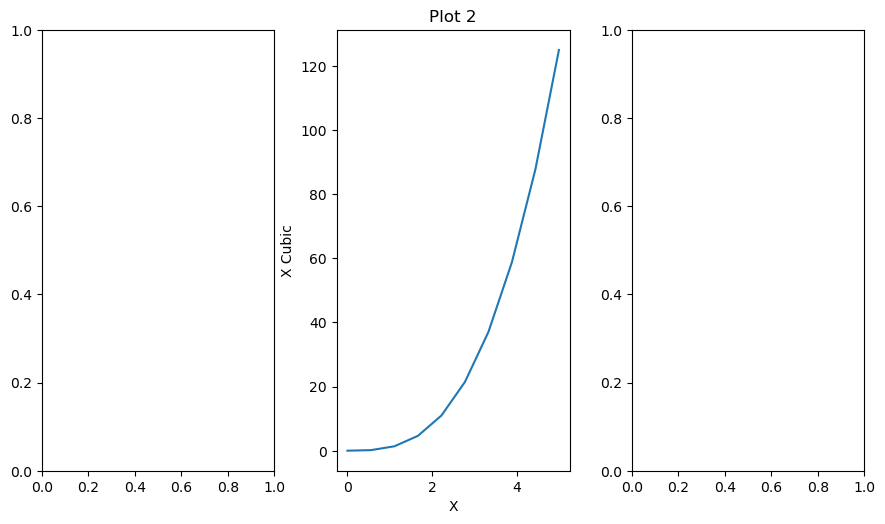

In [9]:
# create a figure with one axis having 3 subplots
# our figure/axis has a grid of subplots with 1 row and 3 columns
fig, ax = plt.subplots(figsize=(9, 5), nrows=1, ncols=3)

# Adjust the padding between and around subplots.
plt.tight_layout()

ax[1].set_title("Plot 2")
ax[1].set_xlabel("X")
ax[1].set_ylabel("X Cubic")
_ = ax[1].plot(x_1, y_1)

## Appearance Options

Default colours (by character):

* b: blue
* g: green
* r: red
* c: cyan
* m: magenta
* y: yellow
* k: black
* w: white

You can also define colours using hexadecimal codes: https://html-color.codes/

You can use colour names as standardised: https://www.w3schools.com/colors/colors_names.asp

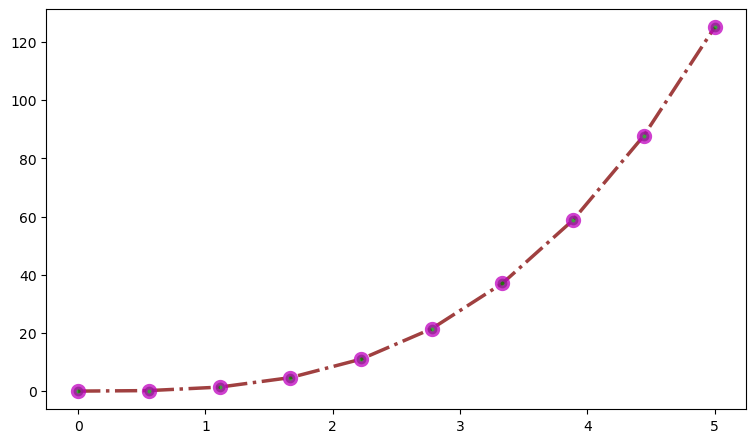

In [10]:
app_fig = plt.figure(figsize=(7, 4))
# I am taking all the space inside the figure
ax = app_fig.add_axes([0, 0, 1, 1])

_ = ax.plot(
    x_1,
    y_1,
    color="maroon",
    alpha=.75, # alpha channel (opacity, default 1)
    lw= 2.5, # line width (default 1)
    ls='-.', # line styles => https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
    marker='o', # markers, for sampling points = >https://matplotlib.org/stable/api/markers_api.html
    markersize=7, # marker size
    markerfacecolor='g',
    markeredgecolor='m',
    markeredgewidth=4
)

Let's suppose I want to "zoom in" in an area of my plot, and that I want to add a grid to my background

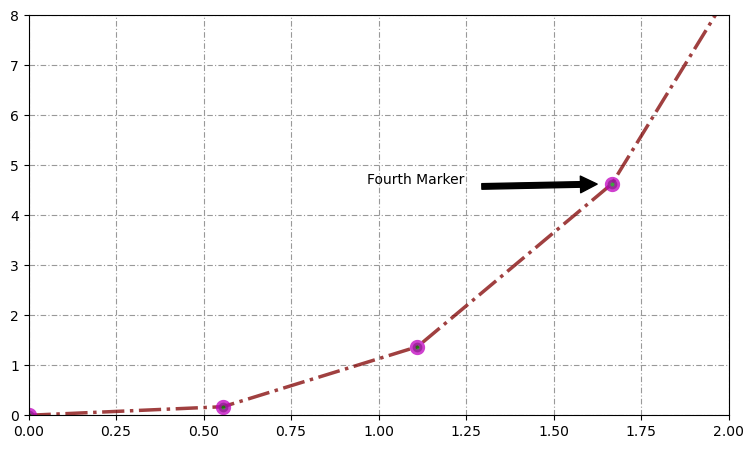

In [11]:
app_fig = plt.figure(figsize=(7, 4))
# I am taking all the space inside the figure
ax = app_fig.add_axes([0, 0, 1, 1])

ax.plot(
    x_1,
    y_1,
    color="maroon",
    alpha=.75, # alpha channel (opacity, default 1)
    lw= 2.5, # line width (default 1)
    ls='-.', # line styles => https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
    marker='o', # markers, for sampling points = >https://matplotlib.org/stable/api/markers_api.html
    markersize=7, # marker size
    markerfacecolor='g',
    markeredgecolor='m',
    markeredgewidth=4
)

ax.set_xlim([0, 2])
ax.set_ylim([0, 8])

# color grey 60%, dashes of 5 points alternated to 1 point dashes separated by two spaces 
ax.grid(True, color='0.6', dashes=(5, 2, 1, 2))

# annotate a point on the chart
_ = ax.annotate(
    "Fourth Marker",
    xy=(x_1[3], y_1[3]), # coordinates of the point to annotate
    xytext=(x_1[3] - 0.7, y_1[3]),  # coordinates of where to place the text
    arrowprops={   # arrow metadata
        'facecolor': 'black',
        'shrink': 0.1
    }
)

## Save figure to a file

You can save figures to a variety of formats: png, jpeg, eps, pdf, svg...

In [ ]:
app_fig.savefig('my-plot.png')

In [ ]:
app_fig.savefig?

## Integration with Pandas

If I want to pass columns from a pandas dataframe to a matplotlib plot I need to extract the numpy array out of the pandas dataframe

Another option is to use the `pd.DataFrame.plot()` method that leverages matplotlib under the hood

## Histograms

In [12]:
np.random.seed(32)
# random arrays with values 1 to 10
randarr_1 = np.random.randint(1, 11, 100000)
randarr_2 = np.random.randint(1, 11, 100000)
randarr_3 = randarr_1 + randarr_2

# 45 different combinations (10 choose 2 = 10!/(2!(10-2)!))

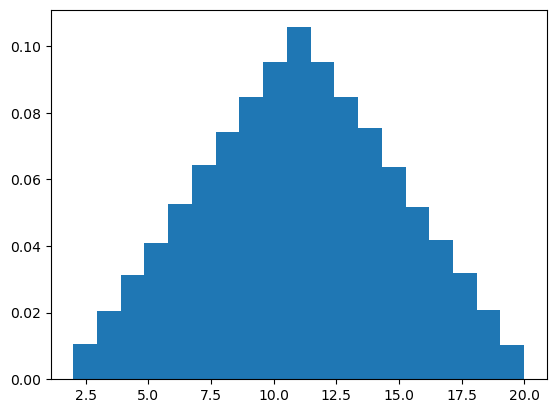

In [13]:
_ = plt.hist(
    randarr_3,
    bins=19,
    density=True, # display the density value
    stacked=True
)

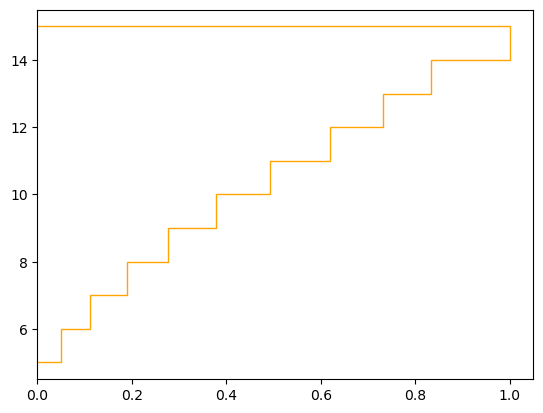

In [14]:
# Some dditional options
# range: pass a tuple with interval to be binned and showed
# cumulative=True to get a cumulative distribution
# histtype="step" => you'll get it as a line plot
# orientation => you can set it to "horizontal" if you like
# color...
_ = plt.hist(
    randarr_3,
    bins=10,
    density=True, # display the density value
    stacked=True,
    range=(5, 15),
    color="orange",
    histtype="step",
    cumulative=True,
    orientation="horizontal"
)

## Bar Charts

In [15]:
# Energy statistics UK 2016
total_electricity = 357 # TWh
en_types = [
    "Gas", "Nuclear", "Wind", "Coal", 
    "Bio", "Solar", "Hydro", "Oil"
]
en_values = [40.2, 20.1, 10.6, 8.6, 8.4, 2.8, 1.5, 7.8]
en_variances = [2, 2, 4, 1, 2, 1, 1, 1]

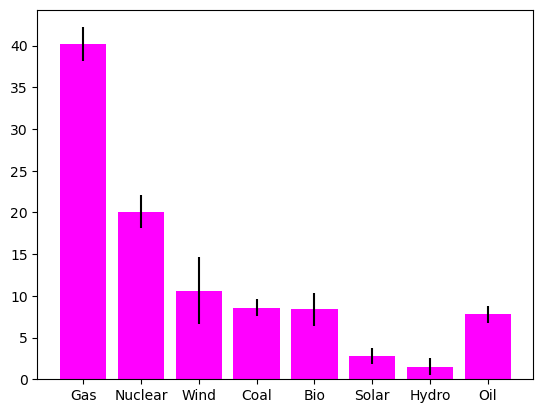

In [16]:
_ = plt.bar(
    en_types,
    en_values,
    color="magenta",
    yerr=en_variances
)

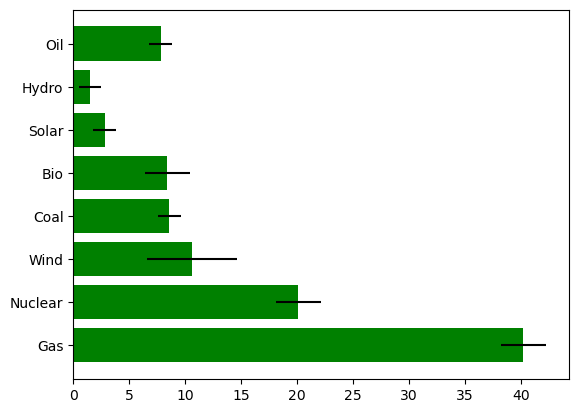

In [17]:
_ = plt.barh(
    en_types,
    en_values,
    color="green",
    xerr=en_variances
)

#### Engineer Graduates by gender

In [18]:
# percentage of males and females in engineers
eng_males = (76, 85, 86, 88, 93)
eng_females = (24, 15, 14, 12, 7)

spc = np.arange(5)

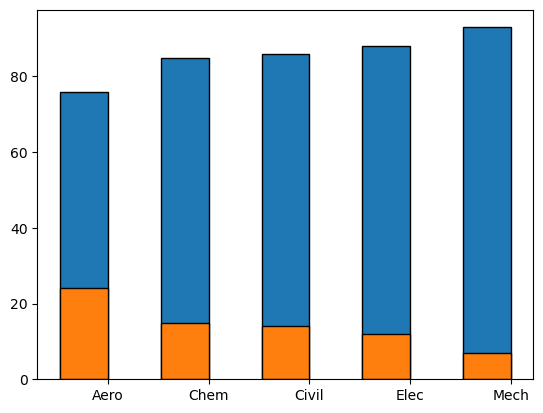

In [19]:
plt.bar(spc, eng_males, width=.475, label="% male", edgecolor="k")
plt.bar(spc, eng_females, width=.475, label="% female", edgecolor="k")
_ = plt.xticks(spc + 0.475 / 2,("Aero", "Chem", "Civil", "Elec", "Mech"))

#### Stacked bar plot examples: teachers by gender

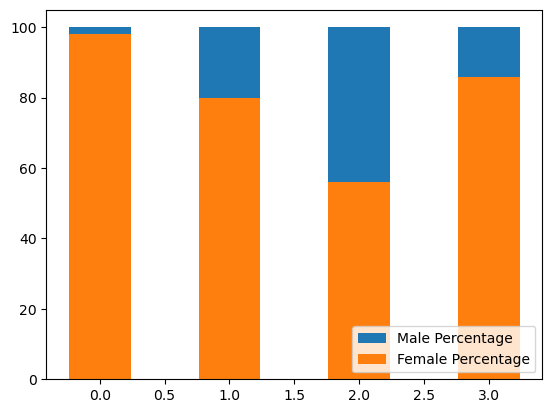

In [20]:
teaching_type = ["Kindergarden", "Elementary", "Secondary", "Special Education"]
male_teach_percentages = np.array([2, 20, 44, 14])
female_teach_percentages = np.array([98, 80, 56, 86])

ind = [x for x, _ in enumerate(teaching_type)]
plt.bar(ind, male_teach_percentages, width=0.475, label="Male Percentage", bottom=female_teach_percentages)
plt.bar(ind, female_teach_percentages, width=0.475, label="Female Percentage")
_ = plt.legend(loc="lower right")

## Pie Charts

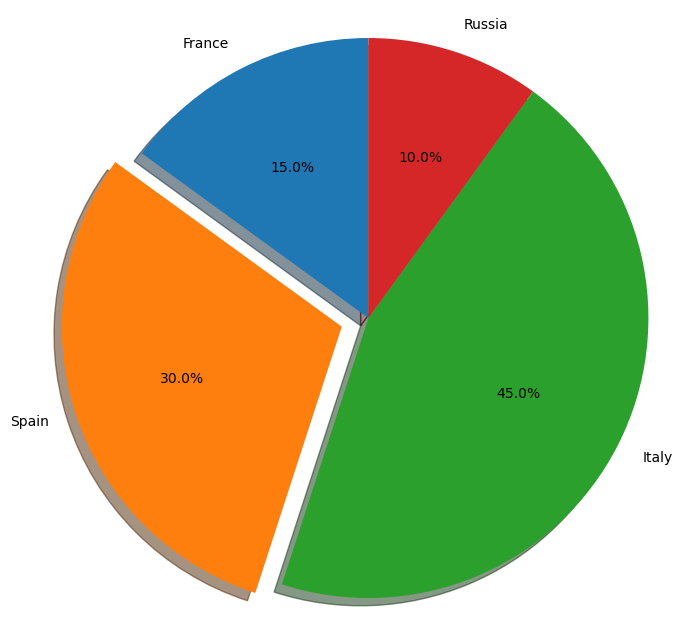

In [21]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'France', 'Spain', 'Italy', 'Russia'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Spain')

fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(
    sizes,
    explode=explode,
    labels=labels, 
    autopct='%1.1f%%', # auto labels the percentages in format (you could also pass a function)
    shadow=True,   # shadow effect
    startangle=90 # custom start angle
)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Doughnut chart

The effect of the doughnut shape is achieved by setting a width to the pie's wedges through the wedgeprops argument.

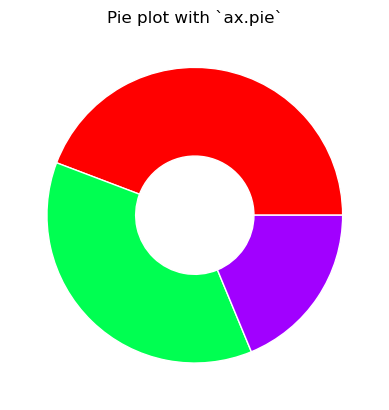

In [22]:
fig, ax = plt.subplots()

size = 0.6
vals = np.array([92, 77, 39])

# pick a colour map
cmap = mpl.cm.hsv
outer_colors = cmap(np.arange(3)*100)

ax.pie(
    vals,
    radius=1,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w')
)

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

## Timeseries (?)

In [23]:
amzn_data = pd.read_csv("../datasets/AMZN-quote-history.csv")
amzn_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-19,3107.00,3145.00,3096.00,3120.76,3120.76,3305100
1,2021-01-20,3181.99,3279.80,3175.00,3263.38,3263.38,5309800
2,2021-01-21,3293.00,3348.55,3289.57,3306.99,3306.99,4936100
3,2021-01-22,3304.31,3321.91,3283.16,3292.23,3292.23,2821900
4,2021-01-25,3328.50,3363.89,3243.15,3294.00,3294.00,3749800
...,...,...,...,...,...,...,...
249,2022-01-12,3331.50,3337.56,3288.34,3304.14,3304.14,2501500
250,2022-01-13,3305.01,3324.43,3221.82,3224.28,3224.28,2609400
251,2022-01-14,3203.00,3245.00,3196.01,3242.76,3242.76,2295800
252,2022-01-18,3182.10,3194.69,3153.29,3178.35,3178.35,3364600


In [24]:
amzn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [25]:
amzn_data_np = amzn_data.to_numpy()
# get the close column
amzn_cp = amzn_data_np[:, 4]

In [26]:
# convert the strings containing the dates to pandas datetime object
amzn_dt = pd.to_datetime(amzn_data.Date)
amzn_dt.dt.date

0      2021-01-19
1      2021-01-20
2      2021-01-21
3      2021-01-22
4      2021-01-25
          ...    
249    2022-01-12
250    2022-01-13
251    2022-01-14
252    2022-01-18
253    2022-01-19
Name: Date, Length: 254, dtype: object

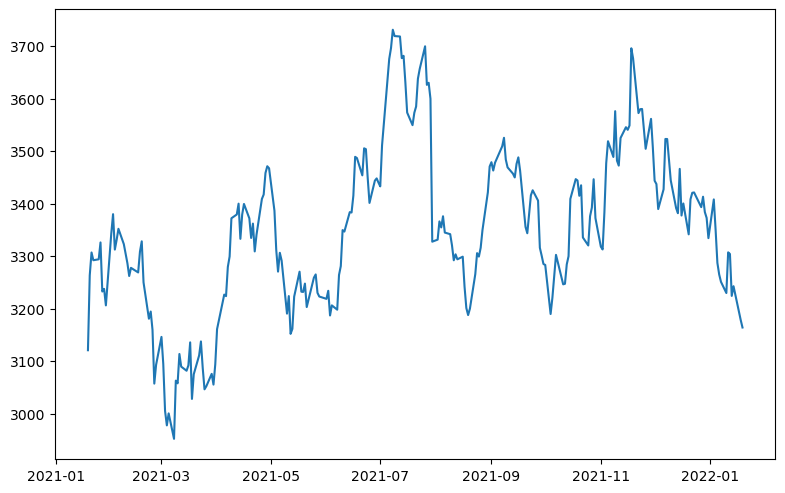

In [27]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])
_ = plt.plot(amzn_dt.dt.date.to_numpy(), amzn_cp)

## Scatterplots

In [28]:
# country array as of 26 Jan 2022
covid_stats = [
    # country, total_cases, total_deaths, total_tests, population
    ("USA",  69808350, 880976, 871652953, 334008890),
    ("India", 38218773, 487719, 709356830, 1401013398),
    ("Brazil", 23420861, 621927, 63776166, 214899473), 
    ("UK", 15506750, 152872, 437010764, 68438346),
    ("France", 15175464, 127869, 216918555, 65497250),
    ("Russia", 10938261, 324060, 247600000, 146031401), 
    ("Turkey", 10664372, 85253, 126263774, 85744257), 
    ("Italy", 9219391, 142205, 159001733, 60324090), 
    ("Spain", 8676916, 91437, 66213858, 46782833), 
    ("Germany", 8262398, 116868, 89622218, 84198923),
    ("Argentina", 7446626, 118628, 31095885, 45837991),
    ("Iran", 6236567, 132152, 43680828, 85657310),
    ("Colombia", 5624520, 131437, 31355675, 51722642),
    ("Messico", 4495310, 302112, 13398630, 131030241),
    ("Poland", 4406553, 103378, 28939723, 37782394),
    ("Indonesia", 4277644, 144199, 68853446, 278002074),
    ("Ukraine", 3799382, 98843, 17332435, 43326674),
    ("Netherlands", 3680896, 21178, 21107399, 17193602),
    ("South Africa", 3568900, 93707, 21895771, 60466356),
    ("Philippines", 3324478, 53153, 26468749, 111838951)

]

In [29]:
covid_stats_df = pd.DataFrame(
    data=covid_stats,
    columns=["country", "total_cases", "total_deaths", "total_tests", "population"]
)
covid_stats_df

,country,total_cases,total_deaths,total_tests,population
0,USA,69808350,880976,871652953,334008890
1,India,38218773,487719,709356830,1401013398
2,Brazil,23420861,621927,63776166,214899473
3,UK,15506750,152872,437010764,68438346
4,France,15175464,127869,216918555,65497250
5,Russia,10938261,324060,247600000,146031401
6,Turkey,10664372,85253,126263774,85744257
7,Italy,9219391,142205,159001733,60324090
8,Spain,8676916,91437,66213858,46782833
9,Germany,8262398,116868,89622218,84198923


We need to normalize this data with respect to the country population. Let's do that.

In [30]:
covid_stats_df["cases/1Mpop"] = (covid_stats_df.total_cases / covid_stats_df.population) * 1e6
covid_stats_df["tests/1Mpop"] = (covid_stats_df.total_tests / covid_stats_df.population) * 1e6
covid_stats_df["deaths/1Mpop"] = (covid_stats_df.total_deaths / covid_stats_df.population) * 1e6
covid_stats_df

,country,total_cases,total_deaths,total_tests,population,cases/1Mpop,tests/1Mpop,deaths/1Mpop
0,USA,69808350,880976,871652953,334008890,209001.47,2609669.92,2637.58
1,India,38218773,487719,709356830,1401013398,27279.38,506316.95,348.12
2,Brazil,23420861,621927,63776166,214899473,108985.20,296772.09,2894.04
3,UK,15506750,152872,437010764,68438346,226579.85,6385466.48,2233.72
4,France,15175464,127869,216918555,65497250,231696.20,3311872.71,1952.28
5,Russia,10938261,324060,247600000,146031401,74903.49,1695525.75,2219.11
6,Turkey,10664372,85253,126263774,85744257,124374.18,1472562.46,994.27
7,Italy,9219391,142205,159001733,60324090,152831.00,2635791.65,2357.35
8,Spain,8676916,91437,66213858,46782833,185472.22,1415345.20,1954.50
9,Germany,8262398,116868,89622218,84198923,98129.50,1064410.50,1388.00


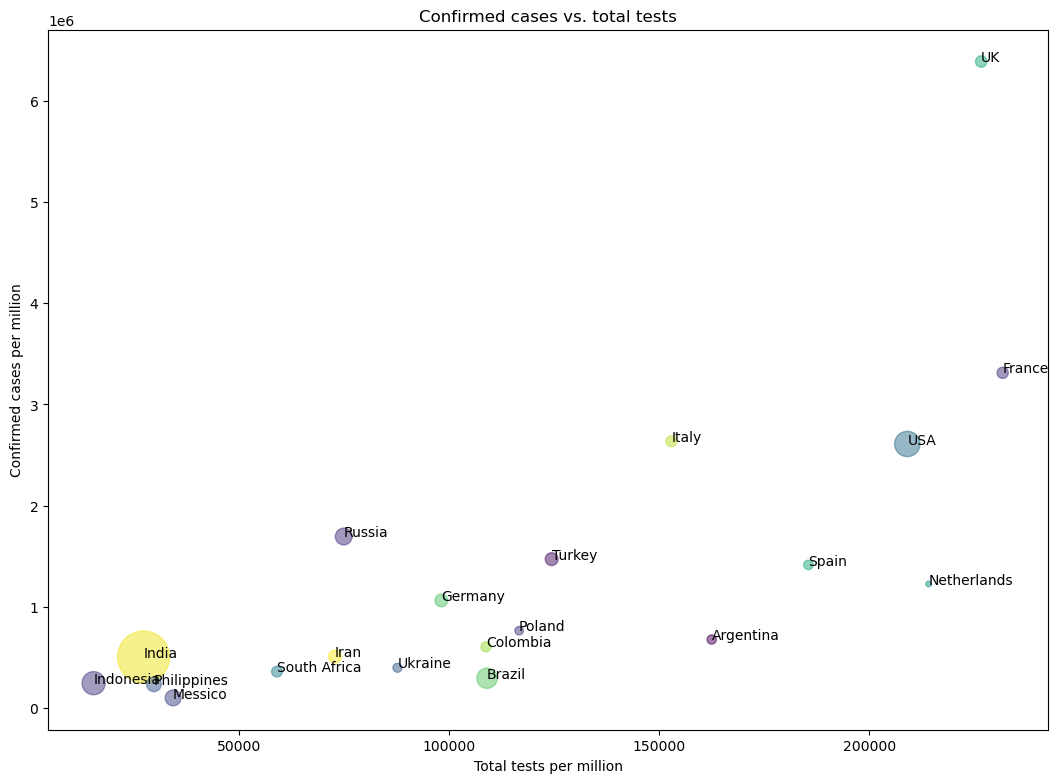

In [31]:
np.random.seed(42)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Confirmed cases vs. total tests")
ax.set_xlabel("Total tests per million")
ax.set_ylabel("Confirmed cases per million")

_ = ax.scatter(
    covid_stats_df["cases/1Mpop"],
    covid_stats_df["tests/1Mpop"],
    # "s" is the marker/dot size
    # normalise dividing by one million to display markers of reasonable size
    s=covid_stats_df["population"]/1e6,
    c=np.random.rand(len(covid_stats_df)),
    alpha=0.5 # to show overlapping dots
)

for ix, row in covid_stats_df.iterrows():
    ax.annotate(row["country"], (row["cases/1Mpop"], row["tests/1Mpop"]))

#### Exercise: draw a scatterplot of confirmed cases per million vs. deaths per million.

## 3D Graphs

In [32]:
from mpl_toolkits import mplot3d

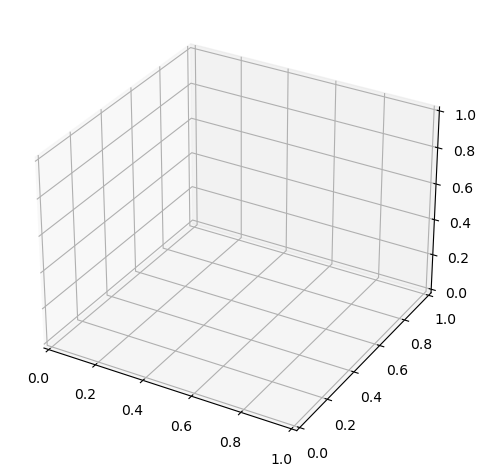

In [33]:
fig = plt.figure(figsize=(8,5), dpi=100)
ax3d = fig.add_axes([0.1, 0.1, 0.9, 0.9], projection='3d')

### 3D Scatterplot

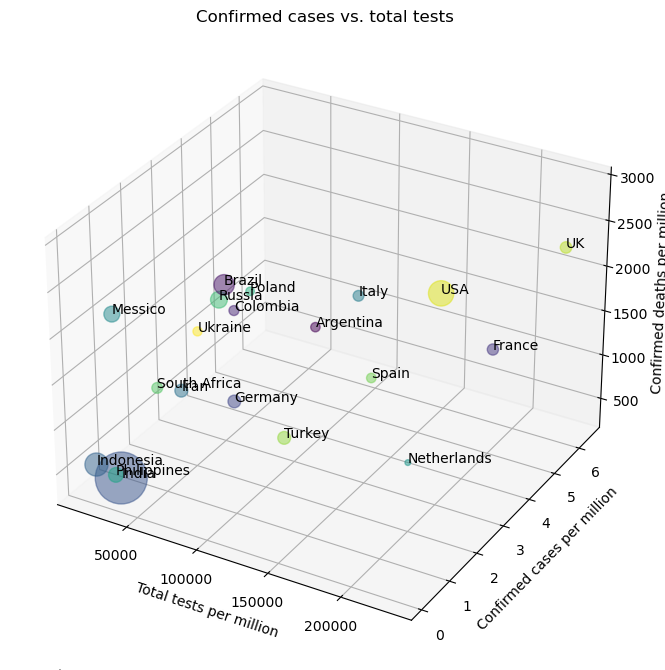

In [34]:
fig = plt.figure(figsize=(12, 7), dpi=100)
ax3d = fig.add_axes([0.1, 0.1, 0.9, 0.9], projection='3d')

ax3d.set_title("Confirmed cases vs. total tests")
ax3d.set_xlabel("Total tests per million")
ax3d.set_ylabel("Confirmed cases per million")
ax3d.set_zlabel("Confirmed deaths per million")

ax3d.scatter3D(
    covid_stats_df["cases/1Mpop"],
    covid_stats_df["tests/1Mpop"],
    covid_stats_df["deaths/1Mpop"],
    s=covid_stats_df["population"]/1e6,
    c=covid_stats_df.country.astype("category").cat.codes,
    alpha=0.5 # to show overlapping dots
)

for ix, row in covid_stats_df.iterrows():
    # annotate won't work on 2D
    ax3d.text(row["cases/1Mpop"], row["tests/1Mpop"], row["deaths/1Mpop"], row["country"])

3D plots are not as easy to interpret as 2D ones. Better to project our graph to a lower dimension!

### 3D Contour plot

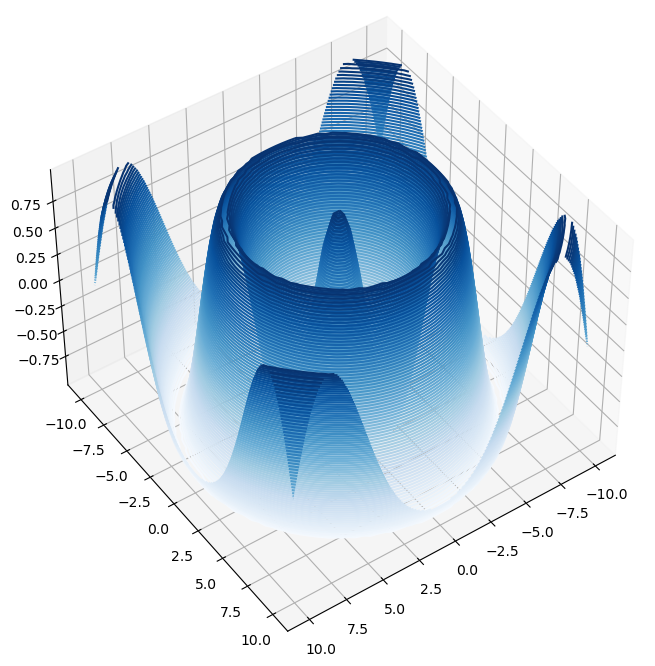

In [35]:
def z(x, y):
    return np.cos(np.sqrt(x**2 + y**2))

x_0 = np.linspace(-10, 10, 50)
y_0 = np.linspace(-10, 10, 50)

# create the 2D rectangular grid out of this two 1D vector
x_0, y_0 = np.meshgrid(x_0, y_0)
z_0 = z(x_0, y_0)


fig = plt.figure(figsize=(12, 7), dpi=100)
ax3d = fig.add_axes([0.1, 0.1, 0.9, 0.9], projection='3d')

ax3d.view_init(45, 55)
_ = ax3d.contour3D(
    x_0,
    y_0,
    z_0,
    80, #  levels: determines the number and positions of the contour lines / regions.
    cmap="Blues"
)

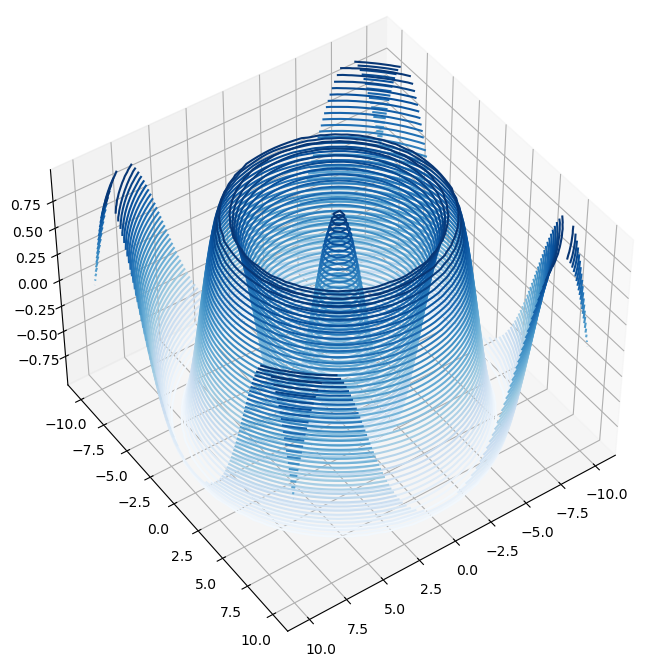

In [36]:
fig = plt.figure(figsize=(12, 7), dpi=100)
ax3d = fig.add_axes([0.1, 0.1, 0.9, 0.9], projection='3d')

ax3d.view_init(45, 55)
_ = ax3d.contour3D(
    x_0,
    y_0,
    z_0,
    40, # fewer labels
    cmap="Blues"
)

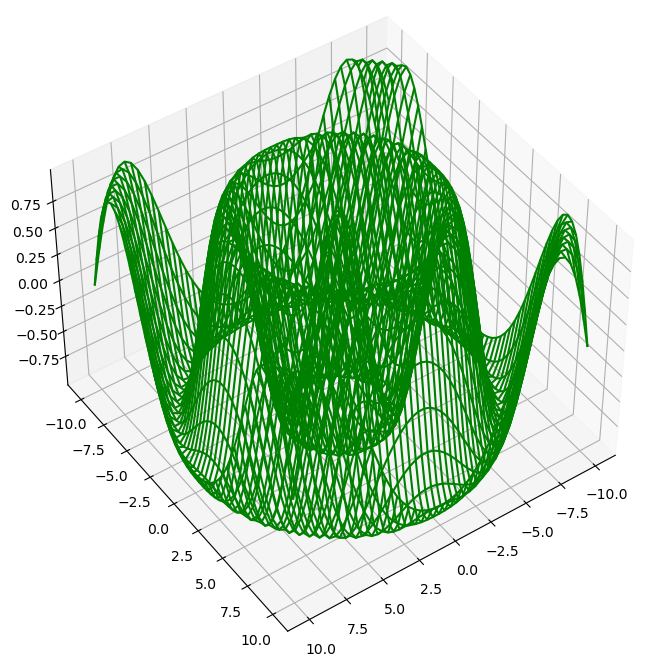

In [37]:
fig = plt.figure(figsize=(12, 7), dpi=100)
ax3d = fig.add_axes([0.1, 0.1, 0.9, 0.9], projection='3d')

ax3d.view_init(45, 55)
_ = ax3d.plot_wireframe(
    x_0,
    y_0,
    z_0,
    color="green"
)

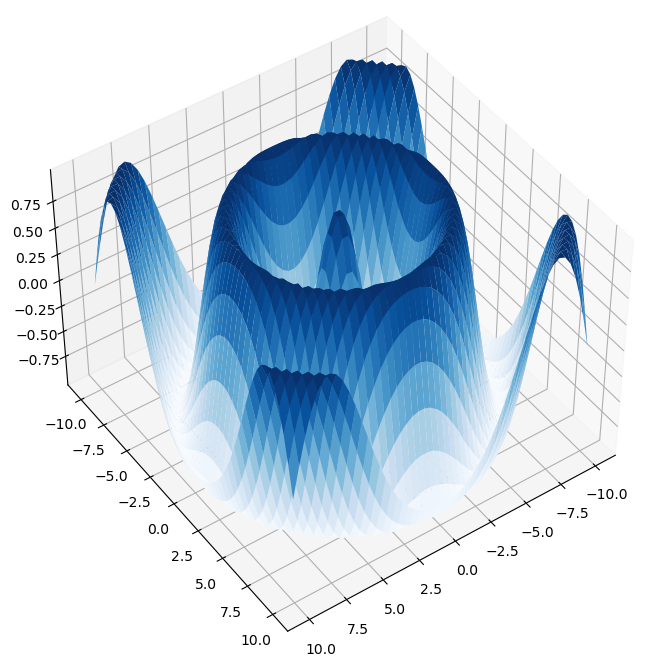

In [38]:
fig = plt.figure(figsize=(12, 7), dpi=100)
ax3d = fig.add_axes([0.1, 0.1, 0.9, 0.9], projection='3d')

ax3d.view_init(45, 55)
_ = ax3d.plot_surface(
    x_0,
    y_0,
    z_0,
    rstride=1,
    cstride=1,
    cmap="Blues",
    edgecolor=None
)

## Heatmaps

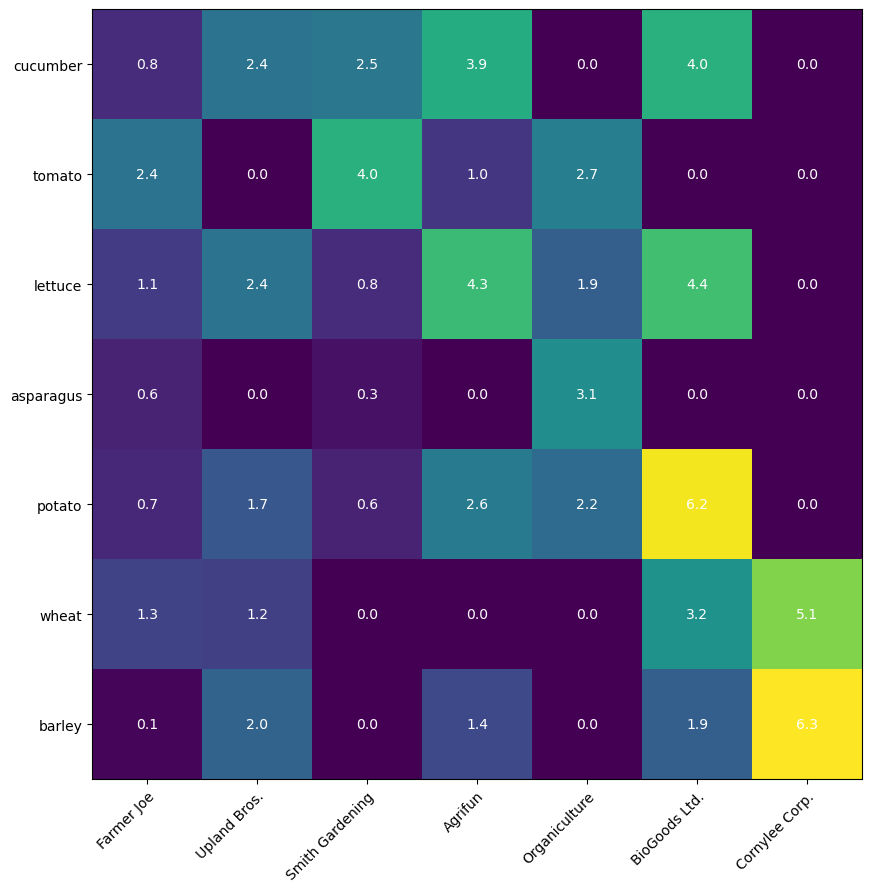

In [39]:
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(harvest)

# Show all ticks 
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))

# this is needed to lanel all ticks for matplotlib < 3.5
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
# "setp" sets one or more properties on the target object(s), in our case the tick labels
# see all list of properties for TickLabels here: https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.axisartist.axis_artist.TickLabels.html?highlight=ticklabels
plt.setp(
    ax.get_xticklabels(),
    rotation=45,
    ha="right",  # horizontal alignment
    rotation_mode="anchor"
)

# Loop over data dimensions and create text annotations.
for ix in range(len(vegetables)):
    for jx in range(len(farmers)):
        text = ax.text(
            jx, ix, harvest[ix, jx],
            ha="center", va="center", color="w" # horizontal & vertical alignment, colour
        )